In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
import numpy as np

data = pd.read_csv("EVI_Biomass.csv")
data.head(5)

,Biomass,EVI
0,5199,0.726231
1,4607,0.435306
2,5280,0.300242
3,4411,0.323778
4,7013,0.367599


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


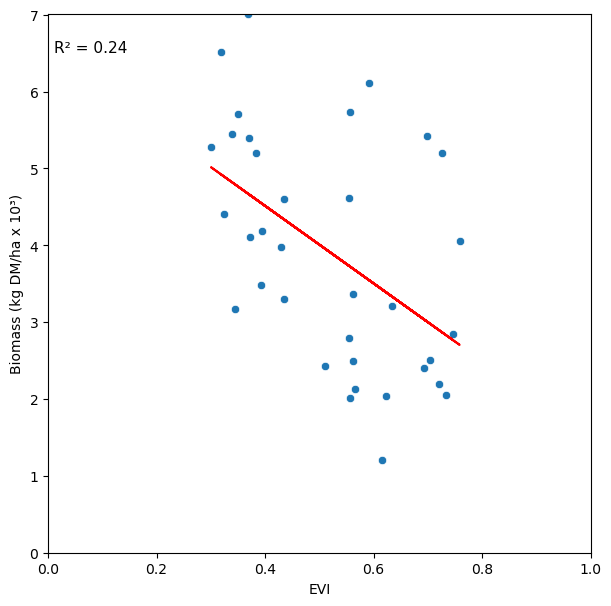

In [3]:
# Perform Linear Regression
x = data['EVI'].values.reshape(-1, 1)
y = data['Biomass'].values
model = LinearRegression().fit(x, y)

# Predict the Biomass using the model for the line
predictions = model.predict(x)

# Calculate R squared
r_squared = model.score(x, y)

# Create the scatter plot, ensuring that the 'Biomass' data is divided by 1000
fig, ax = plt.subplots(figsize=[7, 7])
sns.scatterplot(x='EVI', y=data['Biomass'] / 1000, data=data, ax=ax)

# Plot the regression line
ax.plot(data['EVI'], predictions / 1000, color='red')

# Set the axis labels
ax.set_xlabel('EVI')
ax.set_ylabel('Biomass (kg DM/ha x 10³)')  # Using 'x' for multiplication symbol

# Set x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, max(data['Biomass']) / 1000])

# Add text with only the R squared value
ax.text(0.01, max(data['Biomass']) / 1000 * 0.95, f'R² = {r_squared:.2f}', fontsize=11,
        verticalalignment='top', horizontalalignment='left')

# Remove the legend if it's not needed
ax.legend().remove()
#ax.set_ylim([0, (max(data['Biomass']) / 1000) + 1])

plt.show()


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, shapiro
import numpy as np

# Load data
data = pd.read_csv("EVI_Biomass.csv")

# Extract variables
x = data['EVI'].values.reshape(-1, 1)
y = data['Biomass'].values


In [61]:
from scipy.stats import boxcox
data['EVI_transformed'], _ = boxcox(data['EVI'] + 1)  # Adding 1 to handle zero values


In [63]:
# Perform Shapiro-Wilk test for normality (Reviewer Comment 1)
shapiro_test_x = shapiro(data['EVI'])
shapiro_test_y = shapiro(data['Biomass'])

print(f"Shapiro-Wilk test for EVI: p-value = {shapiro_test_x.pvalue:.4f}")
print(f"Shapiro-Wilk test for Biomass: p-value = {shapiro_test_y.pvalue:.4f}")


Shapiro-Wilk test for EVI: p-value = 0.0126
Shapiro-Wilk test for Biomass: p-value = 0.2090


In [49]:
# Compute Pearson Correlation (Reviewer Comment 2)
pearson_corr, pearson_p = pearsonr(data['EVI'], data['Biomass'])
print(f"Pearson correlation coefficient: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")

Pearson correlation coefficient: -0.49, p-value: 0.0027


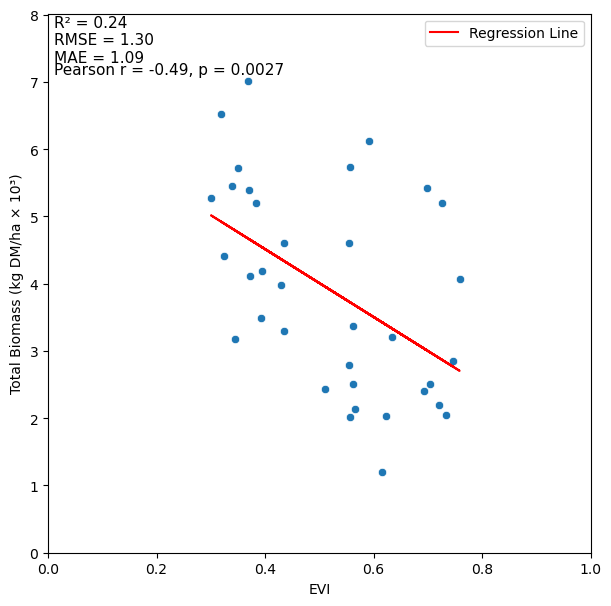

In [67]:
# Perform Linear Regression (Model Training)
model = LinearRegression().fit(x, y)
predictions = model.predict(x)

# Calculate Performance Metrics (Reviewer Comment 3)
r_squared = model.score(x, y)
rmse = np.sqrt(mean_squared_error(y, predictions))  # RMSE
mae = mean_absolute_error(y, predictions)  # MAE

# Create scatter plot
fig, ax = plt.subplots(figsize=[7, 7])
sns.scatterplot(x='EVI', y=data['Biomass'] / 1000, data=data, ax=ax)

# Plot regression line
ax.plot(data['EVI'], predictions / 1000, color='red', label='Regression Line')

# Set labels
ax.set_xlabel('EVI')
ax.set_ylabel('Total Biomass (kg DM/ha × 10³)')

# Set x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, max(data['Biomass']) / 1000 + 1])

# Add text with R², RMSE, and MAE (Now Defined Correctly)
metrics_text = f'R² = {r_squared:.2f}\nRMSE = {rmse/1000:.2f}\nMAE = {mae/1000:.2f}'
ax.text(0.01, max(data['Biomass']) / 1000 * 1.14, metrics_text, fontsize=11, 
        verticalalignment='top', horizontalalignment='left')

# Add Pearson Correlation text
pearson_text = f'Pearson r = {pearson_corr:.2f}, p = {pearson_p:.4f}'
ax.text(0.01, max(data['Biomass']) / 1000 * 1.04, pearson_text, fontsize=11, 
        verticalalignment='top', horizontalalignment='left')

# Move legend to avoid overlap
ax.legend(loc='upper right')

# Save the Plot as JPEG
plt.savefig("EVI_Biomass_Plot.jpg", format="jpeg", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

In [65]:
import scipy.stats as stats
residuals = y - model.predict(x)
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test for residuals: p-value = {shapiro_test.pvalue}")


Shapiro-Wilk test for residuals: p-value = 0.08760489455793301


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pygam import LinearGAM, s

# Load the dataset
data = pd.read_csv("EVI_Biomass.csv")

data.head(5)


,Biomass,EVI
0,5199,0.726231
1,4607,0.435306
2,5280,0.300242
3,4411,0.323778
4,7013,0.367599


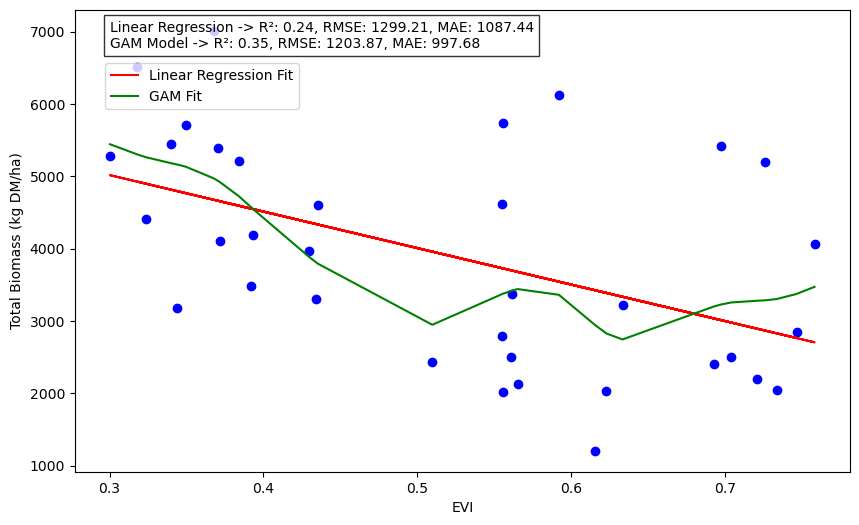

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv("EVI_Biomass.csv")

# Define independent (X) and dependent (Y) variables
X = data[['EVI']].values
Y = data['Biomass'].values

# Fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, Y)
Y_pred_linear = linear_model.predict(X)

# Fit Generalized Additive Model (GAM)
gam = LinearGAM(s(0)).fit(X, Y)

# Generate smooth predictions for GAM (Sort X values before prediction)
X_sorted = np.sort(X, axis=0)  # Sort X values for a smooth curve
Y_pred_gam = gam.predict(X_sorted)  # Predict for sorted X

# Compute performance metrics
r2_linear = r2_score(Y, Y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(Y, Y_pred_linear))
mae_linear = mean_absolute_error(Y, Y_pred_linear)

r2_gam = r2_score(Y, gam.predict(X))  # Use original X for R² calculation
rmse_gam = np.sqrt(mean_squared_error(Y, gam.predict(X)))
mae_gam = mean_absolute_error(Y, gam.predict(X))

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue')

# Plot Linear Regression line
plt.plot(X, Y_pred_linear, color='red', label="Linear Regression Fit")

# Plot GAM curve (smooth)
plt.plot(X_sorted, Y_pred_gam, color='green', label="GAM Fit")

# Add performance metrics at the top-right inside the plot
metrics_text = (
    f"Linear Regression -> R²: {r2_linear:.2f}, RMSE: {rmse_linear:.2f}, MAE: {mae_linear:.2f}\n"
    f"GAM Model -> R²: {r2_gam:.2f}, RMSE: {rmse_gam:.2f}, MAE: {mae_gam:.2f}"
)
plt.text(0.3, max(Y) * 1.02, metrics_text, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Add the legend directly below the metrics
plt.legend(loc='upper left', bbox_to_anchor=(0.03, 0.9))  # Adjusted position to align below the text

# Labels and legend
plt.xlabel("EVI")
plt.ylabel("Total Biomass (kg DM/ha)")
#plt.title("MODEL PERFORMANCE COMPARISON")

# Save the Plot as JPEG
plt.savefig("EVI_Biomass-GAM_Plot.jpg", format="jpeg", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

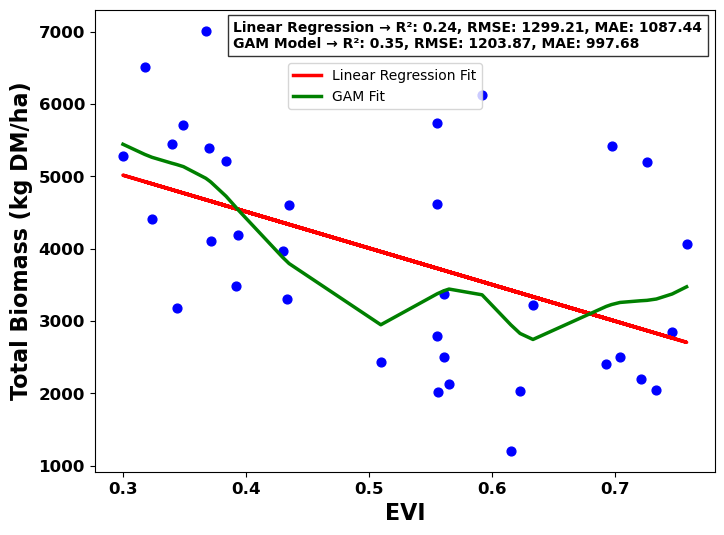

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv("EVI_Biomass.csv")

# Define independent (X) and dependent (Y) variables
X = data[['EVI']].values
Y = data['Biomass'].values

# Fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, Y)
Y_pred_linear = linear_model.predict(X)

# Fit Generalized Additive Model (GAM)
gam = LinearGAM(s(0)).fit(X, Y)

# Generate smooth predictions for GAM (Sort X values before prediction)
X_sorted = np.sort(X, axis=0)  # Sort X values for a smooth curve
Y_pred_gam = gam.predict(X_sorted)  # Predict for sorted X

# Compute performance metrics
r2_linear = r2_score(Y, Y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(Y, Y_pred_linear))
mae_linear = mean_absolute_error(Y, Y_pred_linear)

r2_gam = r2_score(Y, gam.predict(X))
rmse_gam = np.sqrt(mean_squared_error(Y, gam.predict(X)))
mae_gam = mean_absolute_error(Y, gam.predict(X))

# Set plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', s=40)

# Plot Linear Regression line
plt.plot(X, Y_pred_linear, color='red', linewidth=2.5, label="Linear Regression Fit")

# Plot GAM curve (smooth)
plt.plot(X_sorted, Y_pred_gam, color='green', linewidth=2.5, label="GAM Fit")

# Add performance metrics inside the plot
metrics_text = (
    f"Linear Regression → R²: {r2_linear:.2f}, RMSE: {rmse_linear:.2f}, MAE: {mae_linear:.2f}\n"
    f"GAM Model → R²: {r2_gam:.2f}, RMSE: {rmse_gam:.2f}, MAE: {mae_gam:.2f}"
)

plt.text(0.39, max(Y) * 1.02, metrics_text,
         fontsize=10, fontweight='bold',
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Legend formatting placed under metrics text
plt.legend(loc='upper left', bbox_to_anchor=(0.3, 0.9), fontsize=10, frameon=True)

# Labels
plt.xlabel("EVI", fontsize=16, fontweight='bold')
plt.ylabel("Total Biomass (kg DM/ha)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Save the plot as high-res JPEG
plt.savefig("EVI_TotalBiomass-GAM_Plot_highres.jpg", format="jpeg", dpi=600, bbox_inches="tight")

# Show plot
plt.show()
